# Lecture: Models of Response Time Distributions in Decision Making 

## Does Reaction Time Data look like a normal distribution? 

In [2]:
from scipy import stats
import numpy as np
from numpy import random as random
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('data/ReactionTimeData.csv')
data.keys()

Index(['Unnamed: 0', 'Subject', 'Condition', 'Correct', 'ReactionTime'], dtype='object')

In [4]:
subject = data['Subject']
condition = data['Condition']
correct = data['Correct']
rt = data['ReactionTime']
rt = np.array(rt)
subject= np.array(subject)
correct = np.array(correct)

In [5]:

condlabels = ['Easy','Medium','Hard']
#i like making empty arrays 
ncond = len(condlabels)
condmeans = np.zeros(3)
condstd = np.zeros(3)

In [6]:
thesubject = 7
for j in range(ncond):
    condmeans[j] = np.mean(rt[(condition == condlabels[j]) & (subject == thesubject)])
    condstd[j] = np.std(rt[(condition == condlabels[j]) & (subject == thesubject)])


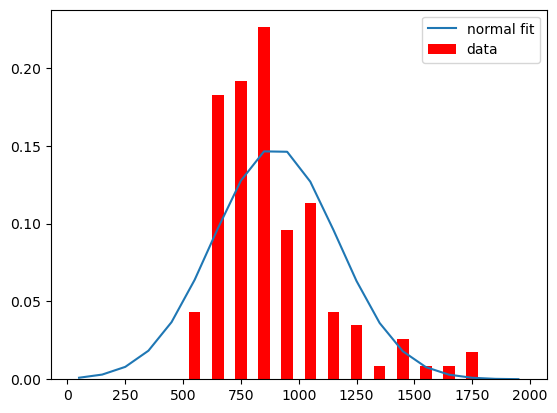

In [7]:
condindex = 2
thebins = np.linspace(0,2000,21) #where did i get 2000? 
nhist,bin_edges = np.histogram(rt[(condition == condlabels[condindex]) &(subject == thesubject)], bins=thebins)
rhist = nhist/np.sum(nhist)
bincenter = bin_edges[0:20]+bin_edges[1:21]
bincenter = bincenter/2
normfit = stats.norm.pdf(bincenter,loc=condmeans[condindex],scale=condstd[condindex])
normfit = normfit/np.sum(normfit) 
plt.figure()
plt.bar(bincenter,rhist,color = 'r',width=50,label='data')
plt.plot(bincenter,normfit,label='normal fit')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Correct vs Error Trials')

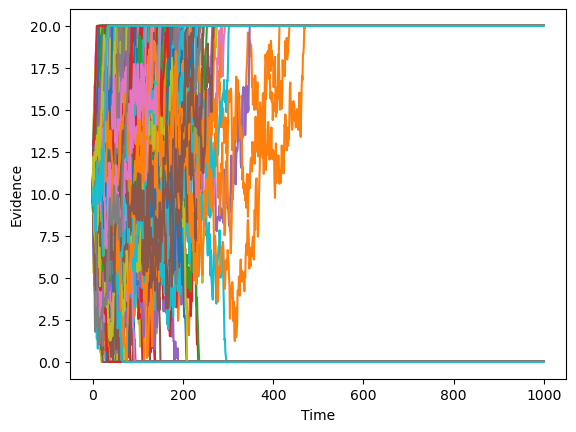

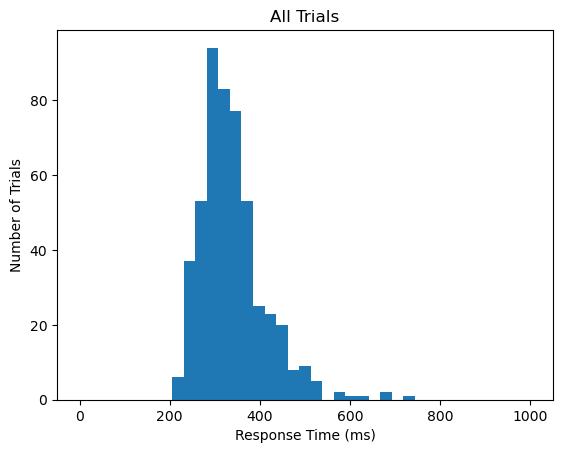

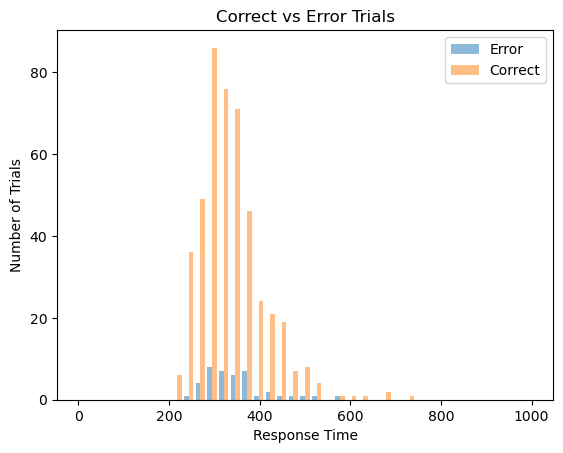

In [11]:

mu = 0.1   #BY CONVENTION MU MUST BE POSITIVE AND THE CORRECT BOUNDARY IS ABOVE
sd = 1  #VARIABILITY WITHIN TRIAL 
nsteps = 1000 # LENGTH OF WALK
ntrials = 500 #NUMBER OF TRIALS IN EXPERIMENT
criterion = 20 #UPPER BOUNDARY FOR CORRECT RESPONSES 
beta = 0.5 #NORMALIZED BIAS
bias = beta*criterion 
#SET RANDOM NUMBER SEED 
rng = random.default_rng(seed=1968)
# OUTPUT VARIABLES
sample = np.zeros(nsteps+1)  #This is a single random draw from normal distribution
path = np.zeros((ntrials,nsteps+1)) #This is all the random walks
rt = np.zeros((ntrials)) #These are the rts across trials 
correct = np.zeros((ntrials)) #This is accuracy data. ZERO IS WRONG, ONE IS RIGHT
for j in range(ntrials):
    goodpath = 0 # variable to test if the path is good. 
    while goodpath == 0: #WILL REPEAT RANDOM WALK UNTIL A GOOD WALK
        draw = rng.normal(mu,sd,nsteps) #DRAW A WALK
        sample[0] = bias #START AT BIAS
        sample[1:] = draw
        walk = np.cumsum(sample) #SUM THE WALK.
        crossbnd = np.where((walk > criterion) | (walk < 0)) #TEST BOTH BOUNDARIES
        if np.size(crossbnd) != 0: #DETECT THAT IT CROSSED A BOUNDARY
            goodpath = 1 #SET GOODPATH TO 1 TO EXIT WHILE LOOP
            path[j,:] = walk # SAVE THE WALK
        else:
            print("Bad Walk")
    rt[j] = crossbnd[0][0]  #FIND FIRST CROSSING POINT 
    rtindex = rt[j].astype(int)
    if path[j,rtindex] > criterion: #DETECT CORRECT TRIALS
        path[j,rtindex:] = criterion #STOP THE WALK AT BOUNDARY
        correct[j] = 1 #
    else: #INCORRECT TRIAL
        path[j,rtindex:] = 0 #STOP WALK AT LOWER BOUNDARY
               
#ADD NDT TO RT DATA 
ndt = 200+rng.uniform(0,100,len(rt))
rt = rt+ndt                
#COMPUTE ACCURACY
accuracy = np.mean(correct)
#PLOT ALL PATHS
for j in range(ntrials):
    plt.plot(path[j,:])

plt.xlabel('Time')
plt.ylabel('Evidence')
#MAKE A HISTOGRAM OF ALL TRIALS
plt.figure()  
bins = np.linspace(0,nsteps,40)  
plt.hist(rt,bins)
plt.xlabel('Response Time (ms)')
plt.ylabel('Number of Trials')
plt.title('All Trials')
#MAKE A HISTOGRAM SEPARATING CORRECT FROM INCORRECT
errorrt = rt[np.where(correct == 0)]
correctrt = rt[np.where(correct == 1)]
plt.figure()
plt.hist([errorrt,correctrt], bins, alpha=0.5, label=['Error', 'Correct'])

plt.legend(loc='upper right')
plt.xlabel('Response Time')
plt.ylabel('Number of Trials')
plt.title('Correct vs Error Trials')